# Importing the libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# Loading the dataset

In [3]:
raw_data = pd.read_csv('House-Price-Datasets.csv').drop('Unnamed: 0', axis=1)
raw_data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# Data Preprocessing

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data1 = raw_data.copy()
# We can consider that the houses which have 'NaN' in 'society' are not affiliated in any society. Obviously it cannot be 
# said without field investigation. Just for learning purpose let's assume those are single houses.
data1['society'] = data1['society'].fillna('Single Housing')
# 'NaN' value in 'balcony' is zero as these houses have no balcony.
data1['balcony'] = data1['balcony'].fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data1.isnull().sum()
# Missing value in 'location', 'size', 'bath' cannot be filled. So, we will drop them...

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [8]:
data = data1.dropna(axis=0)
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
data.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13246,13246,13246,13246,13246,13246,13246.000000,13246.000000,13246.000000
unique,4,80,1304,31,2668,2067,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Single Housing,1200,NaN,NaN,NaN
freq,8740,10564,534,5198,5499,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692586,1.520233,112.389392
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341506,0.859301,149.076587
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [11]:
## data['total_sqft'] = data['total_sqft'].astype(float) will not work
## As we can see we cannot convert 'total_sqft' data from object to float because there are some range value in it.
## Either we have to delete those range values or replace the range values with their means.
## Let's define a fucntion to know how many values can be converted into float
def is_it_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
# Let's see the only range values
data[~data.total_sqft.apply(is_it_float)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800


In [16]:
# Counting the range values
data[~data.total_sqft.apply(is_it_float)].count()

area_type       190
availability    190
location        190
size            190
society         190
total_sqft      190
bath            190
balcony         190
price           190
dtype: int64

In [17]:
# Creating a fucntion for converting the range values into their means and also converting them into float
def convert_sqft_to_num(x):
    if_split = x.split('-')
    if len(if_split) == 2:
        return np.average([float(if_split[0]), float(if_split[1])])
    try:
        return float(x)
    except:
        return None

In [18]:
# testing the function for range value
convert_sqft_to_num('2000 - 3000')

2500.0

In [19]:
# testing the function for normal value
convert_sqft_to_num('3000')

3000.0

In [20]:
# Now we will convert the 'total_sqft' column from object to function using the convert function -we just ceated
data1= data.copy()
data1['total_sqft'] = data1['total_sqft'].apply(convert_sqft_to_num)
data1.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13246,13246,13246,13246,13246,13200.000000,13246.000000,13246.000000,13246.000000
unique,4,80,1304,31,2668,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Single Housing,NaN,NaN,NaN,NaN
freq,8740,10564,534,5198,5499,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1555.302783,2.692586,1.520233,112.389392
std,NaN,NaN,NaN,NaN,NaN,1237.323445,1.341506,0.859301,149.076587
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,1100.000000,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,1275.000000,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,1672.000000,3.000000,2.000000,120.000000


In [21]:
data1['area_type'].value_counts()

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

<Axes: xlabel='area_type', ylabel='price'>

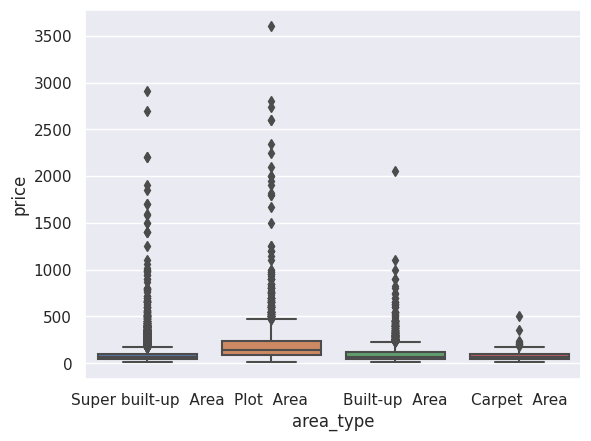

In [22]:
sns.boxplot(data=data1, x='area_type', y='price')

In [23]:
data1['availability'].value_counts()

availability
Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [24]:
data1['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [ ]:
data1['size'].value_counts()

In [25]:
selected_row = data1[data1['size'] == '18 Bedroom']
selected_row


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11559,Plot Area,18-Apr,1Kasavanhalli,18 Bedroom,HMwerCo,1200.0,18.0,0.0,200.0


In [26]:
selected_rows = data1.loc[data1['size'].isin(['9 BHK',
'8 BHK',            
'11 BHK',           
'11 Bedroom',       
'10 BHK',           
'14 BHK',           
'13 BHK',           
'12 Bedroom',       
'27 BHK',           
'43 Bedroom',       
'16 BHK',          
'19 BHK',    
'18 Bedroom'])]
selected_rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000.0,9.0,3.0,360.0
538,Super built-up Area,Ready To Move,Mico Layout,9 BHK,Amsomun,5000.0,9.0,3.0,210.0
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,Single Housing,NaN,9.0,1.0,296.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,Single Housing,8000.0,27.0,0.0,230.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,Single Housing,1200.0,11.0,0.0,170.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10 BHK,Single Housing,12000.0,12.0,0.0,525.0
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,Single Housing,2000.0,16.0,0.0,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,Single Housing,10000.0,16.0,0.0,550.0
3853,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,Single Housing,1200.0,6.0,3.0,150.0
4585,Carpet Area,Ready To Move,4th Block Koramangala,9 BHK,Single Housing,4500.0,9.0,0.0,500.0


In [27]:
# creating new column for the size
data1['bhk'] = data1['size'].apply(lambda x : int(x.split(' ')[0]))
data1.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
count,13246,13246,13246,13246,13246,13200.000000,13246.000000,13246.000000,13246.000000,13246.000000
unique,4,80,1304,31,2668,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8740,10564,534,5198,5499,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1555.302783,2.692586,1.520233,112.389392,2.801902
std,NaN,NaN,NaN,NaN,NaN,1237.323445,1.341506,0.859301,149.076587,1.295758
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,8.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,1672.000000,3.000000,2.000000,120.000000,3.000000


In [28]:
data1['society'].value_counts()

society
Single Housing    5499
GrrvaGr             80
PrarePa             71
Sryalan             59
Prtates             58
                  ... 
K tlete              1
Amionce              1
JaghtDe              1
Jauraht              1
RSntsAp              1
Name: count, Length: 2668, dtype: int64

# Determining the variables of interest

In [29]:
# Let's check the column names
data1.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')

In [30]:
# Removing the redundent columns from dataset
data2 = data1.drop(['availability','location','size','society'], axis=1)
data2.describe(include='all')

,area_type,total_sqft,bath,balcony,price,bhk
count,13246,13200.000000,13246.000000,13246.000000,13246.000000,13246.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,NaN,NaN,NaN,NaN,NaN
freq,8740,NaN,NaN,NaN,NaN,NaN
mean,NaN,1555.302783,2.692586,1.520233,112.389392,2.801902
std,NaN,1237.323445,1.341506,0.859301,149.076587,1.295758
min,NaN,1.000000,1.000000,0.000000,8.000000,1.000000
25%,NaN,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,NaN,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,NaN,1672.000000,3.000000,2.000000,120.000000,3.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


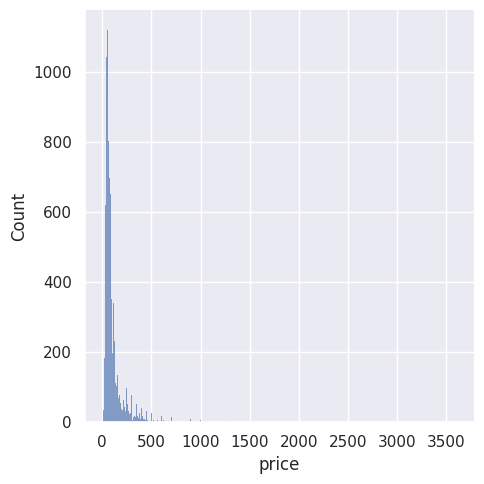

In [31]:
sns.displot(data=data2, x='price')

In [98]:
# We can see there are some outliers present. 'price' is skewed to the right
p = data2['price'].quantile(0.98)
data3 = data2[data2['price']<p]
data3.describe(include='all')

,area_type,total_sqft,bath,balcony,price,bhk
count,12981,12936.000000,12981.000000,12981.000000,12981.000000,12981.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,NaN,NaN,NaN,NaN,NaN
freq,8653,NaN,NaN,NaN,NaN,NaN
mean,NaN,1490.310646,2.649180,1.521840,97.264686,2.766197
std,NaN,1066.949496,1.257225,0.853754,77.369751,1.219999
min,NaN,1.000000,1.000000,0.000000,8.000000,1.000000
25%,NaN,1100.000000,2.000000,1.000000,49.850000,2.000000
50%,NaN,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,NaN,1641.250000,3.000000,2.000000,115.000000,3.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


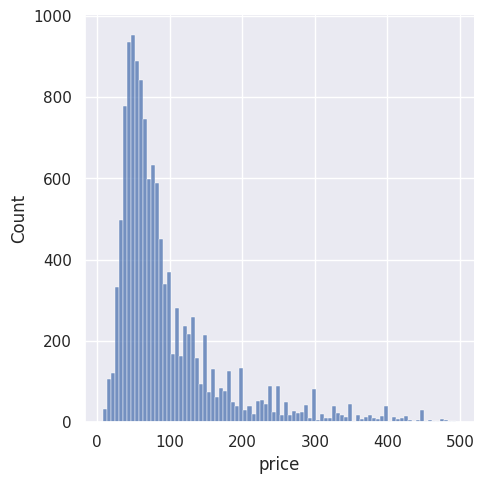

In [60]:
sns.displot(data=data3, x='price')
# Now there are some fewer outliers

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


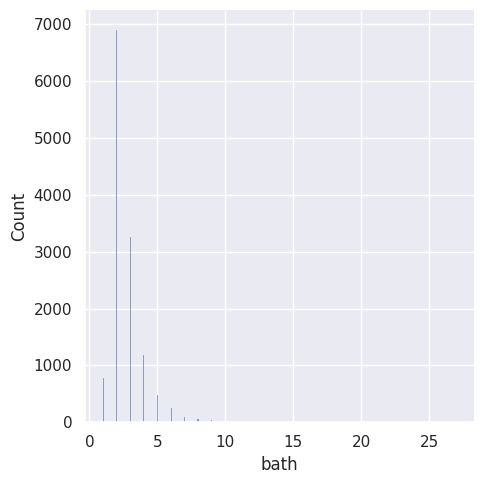

In [34]:
sns.displot(data3['bath'])

In [99]:
b = data3['bath'].quantile(0.99)
data4 = data3[data3['bath']<b]
data4.describe(include='all')

,area_type,total_sqft,bath,balcony,price,bhk
count,12762,12719.000000,12762.000000,12762.000000,12762.000000,12762.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,NaN,NaN,NaN,NaN,NaN
freq,8625,NaN,NaN,NaN,NaN,NaN
mean,NaN,1475.251711,2.553126,1.525466,95.582423,2.678107
std,NaN,989.379222,0.995188,0.844005,75.940013,0.986535
min,NaN,1.000000,1.000000,0.000000,8.000000,1.000000
25%,NaN,1100.000000,2.000000,1.000000,49.000000,2.000000
50%,NaN,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,NaN,1635.000000,3.000000,2.000000,110.000000,3.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


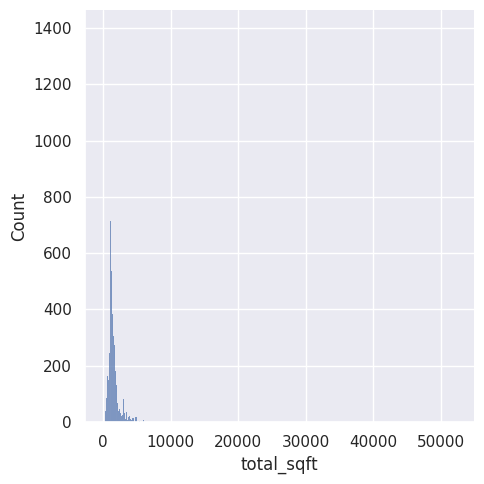

In [36]:
sns.displot(data4['total_sqft'])

In [100]:
sq= data4['total_sqft'].quantile(0.99)
data5 =data4[data4['total_sqft']<sq]
data5.describe(include='all')

,area_type,total_sqft,bath,balcony,price,bhk
count,12591,12591.000000,12591.00000,12591.000000,12591.000000,12591.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,NaN,NaN,NaN,NaN,NaN
freq,8575,NaN,NaN,NaN,NaN,NaN
mean,NaN,1426.127632,2.53578,1.526090,93.307644,2.664046
std,NaN,599.797584,0.97871,0.839606,72.362835,0.975755
min,NaN,1.000000,1.00000,0.000000,8.000000,1.000000
25%,NaN,1100.000000,2.00000,1.000000,49.000000,2.000000
50%,NaN,1255.000000,2.00000,2.000000,69.180000,3.000000
75%,NaN,1612.500000,3.00000,2.000000,110.000000,3.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


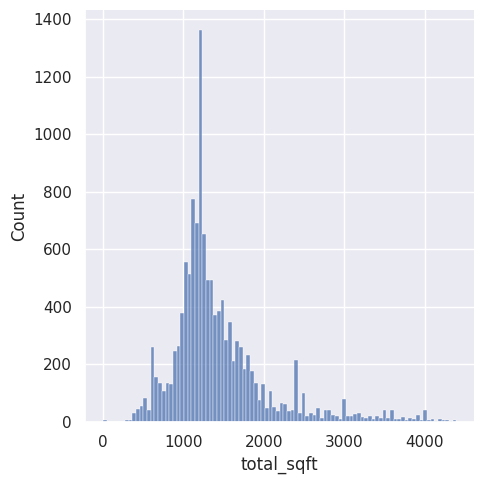

In [38]:
sns.displot(data5['total_sqft'])

Text(0.5, 1.0, 'Price and BHK')

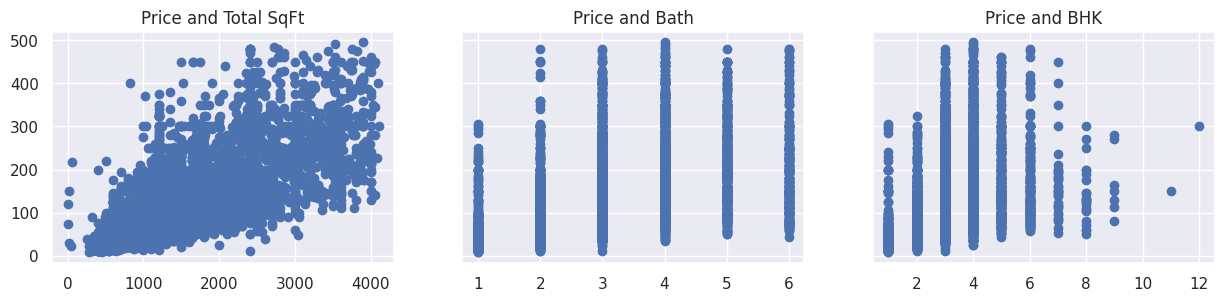

In [101]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data5['total_sqft'],data5['price'])
ax1.set_title('Price and Total SqFt')
ax2.scatter(data5['bath'],data5['price'])
ax2.set_title('Price and Bath')
ax3.scatter(data5['bhk'],data5['price'])
ax3.set_title('Price and BHK')

In [102]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data5['price'])

# Then we add it to our data frame
data5['log_price'] = log_price
data5

/tmp/ipykernel_33/1337375016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['log_price'] = log_price


,area_type,total_sqft,bath,balcony,price,bhk,log_price
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,3.665355
1,Plot Area,2600.0,5.0,3.0,120.00,4,4.787492
2,Built-up Area,1440.0,2.0,3.0,62.00,3,4.127134
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,4.553877
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,3.931826
...,...,...,...,...,...,...,...
13314,Super built-up Area,1715.0,3.0,3.0,112.00,3,4.718499
13315,Built-up Area,3453.0,4.0,0.0,231.00,5,5.442418
13316,Super built-up Area,3600.0,5.0,0.0,400.00,4,5.991465
13317,Built-up Area,1141.0,2.0,1.0,60.00,2,4.094345


Text(0.5, 1.0, 'Log Price and BHK')

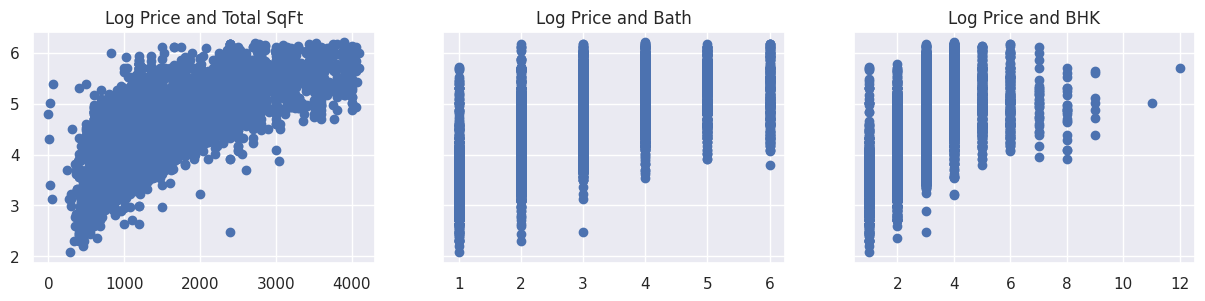

In [103]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data5['total_sqft'],data5['log_price'])
ax1.set_title('Log Price and Total SqFt')
ax2.scatter(data5['bath'],data5['log_price'])
ax2.set_title('Log Price and Bath')
ax3.scatter(data5['bhk'],data5['log_price'])
ax3.set_title('Log Price and BHK')

# log transformation doesn't mitigate the heteroskedasticity issue.

In [104]:
# Let's change the price into per square price
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.drop('log_price',axis=1)

/tmp/ipykernel_33/3683648393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']


,area_type,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Super built-up Area,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Built-up Area,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,3600.0,5.0,0.0,400.00,4,11111.111111
13317,Built-up Area,1141.0,2.0,1.0,60.00,2,5258.545136


In [105]:
data5.describe()

,total_sqft,bath,balcony,price,bhk,log_price,price_per_sqft
count,12591.000000,12591.00000,12591.000000,12591.000000,12591.000000,12591.000000,1.259100e+04
mean,1426.127632,2.53578,1.526090,93.307644,2.664046,4.320012,7.414587e+03
std,599.797584,0.97871,0.839606,72.362835,0.975755,0.629499,1.073093e+05
min,1.000000,1.00000,0.000000,8.000000,1.000000,2.079442,5.000000e+02
25%,1100.000000,2.00000,1.000000,49.000000,2.000000,3.891820,4.237288e+03
50%,1255.000000,2.00000,2.000000,69.180000,3.000000,4.236712,5.334627e+03
75%,1612.500000,3.00000,2.000000,110.000000,3.000000,4.700480,7.041034e+03
max,4100.000000,6.00000,3.000000,495.000000,12.000000,6.204558,1.200000e+07


In [106]:
ps = data5['price_per_sqft'].quantile(0.99)
data6 = data5[data5['price_per_sqft']<ps]
data6.describe()

,total_sqft,bath,balcony,price,bhk,log_price,price_per_sqft
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,1429.698966,2.520912,1.526933,91.545761,2.647267,4.307718,6136.481123
std,600.254127,0.962479,0.837428,70.035138,0.953313,0.619688,2962.651150
min,250.000000,1.000000,0.000000,8.000000,1.000000,2.079442,500.000000
25%,1100.000000,2.000000,1.000000,48.860000,2.000000,3.888959,4225.352113
50%,1260.000000,2.000000,2.000000,69.000000,3.000000,4.234107,5307.692308
75%,1616.000000,3.000000,2.000000,108.000000,3.000000,4.682131,6969.508401
max,4100.000000,6.000000,3.000000,495.000000,12.000000,6.204558,19965.277778


Text(0.5, 1.0, 'Price per SqFt and BHK')

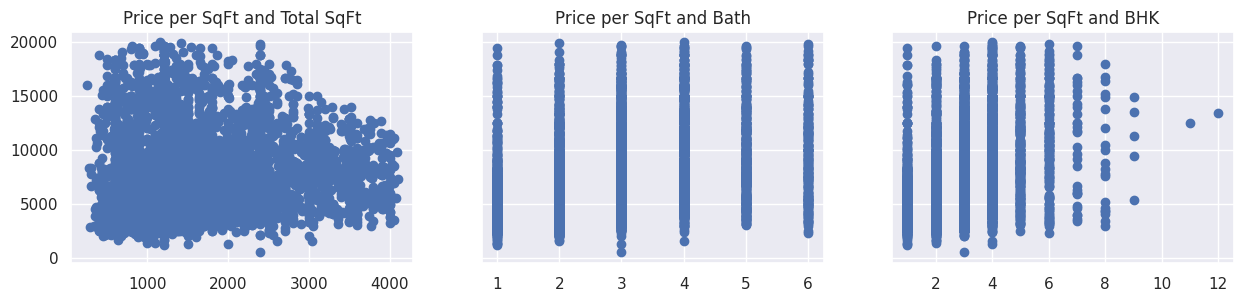

In [107]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data6['total_sqft'],data6['price_per_sqft'])
ax1.set_title('Price per SqFt and Total SqFt')
ax2.scatter(data6['bath'],data6['price_per_sqft'])
ax2.set_title('Price per SqFt and Bath')
ax3.scatter(data6['bhk'],data6['price_per_sqft'])
ax3.set_title('Price per SqFt and BHK')

In [108]:
log_price_ps = np.log(data6['price'])
data6_1 = data6.copy()

# Then we add it to our data frame
data6_1['log_price_ps'] = log_price_ps
data6_1

,area_type,total_sqft,bath,balcony,price,bhk,log_price,price_per_sqft,log_price_ps
0,Super built-up Area,1056.0,2.0,1.0,39.07,2,3.665355,3699.810606,3.665355
1,Plot Area,2600.0,5.0,3.0,120.00,4,4.787492,4615.384615,4.787492
2,Built-up Area,1440.0,2.0,3.0,62.00,3,4.127134,4305.555556,4.127134
3,Super built-up Area,1521.0,3.0,1.0,95.00,3,4.553877,6245.890861,4.553877
4,Super built-up Area,1200.0,2.0,1.0,51.00,2,3.931826,4250.000000,3.931826
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,1715.0,3.0,3.0,112.00,3,4.718499,6530.612245,4.718499
13315,Built-up Area,3453.0,4.0,0.0,231.00,5,5.442418,6689.834926,5.442418
13316,Super built-up Area,3600.0,5.0,0.0,400.00,4,5.991465,11111.111111,5.991465
13317,Built-up Area,1141.0,2.0,1.0,60.00,2,4.094345,5258.545136,4.094345


Text(0.5, 1.0, 'Lpg Price per SqFt and BHK')

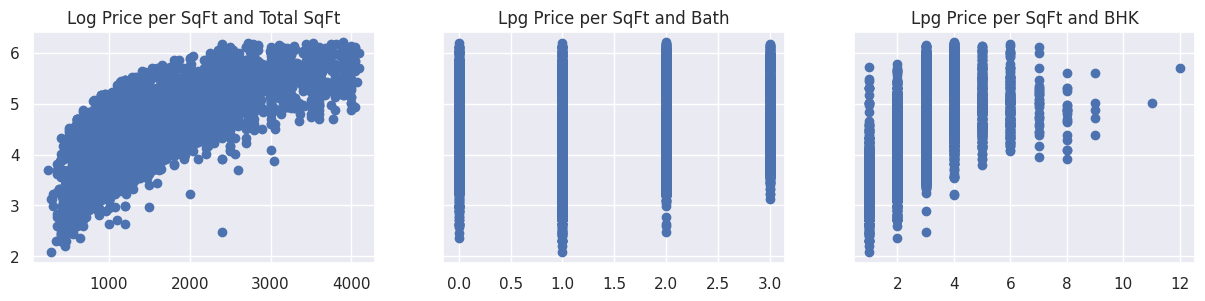

In [109]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data6_1['total_sqft'],data6_1['log_price_ps'])
ax1.set_title('Log Price per SqFt and Total SqFt')
ax2.scatter(data6_1['balcony'],data6_1['log_price_ps'])
ax2.set_title('Lpg Price per SqFt and Bath')
ax3.scatter(data6_1['bhk'],data6_1['log_price_ps'])
ax3.set_title('Lpg Price per SqFt and BHK')

## Multicollinearity

In [111]:
# Checking the multicollinearity with the 'statsmodel'
# sklearn does not have a way to check for multicollinearity because it is a statistical issue not an ML issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
# we will take only the numercial variables
variables = data6_1[['total_sqft','bath','balcony','bhk']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,10.792409,total_sqft
1,30.707283,bath
2,3.779372,balcony
3,26.240581,bhk


In [112]:
# 'bath' have highest VIF value so let's check the VIF without the bath
variables2 = data6_1[['total_sqft','balcony','bhk']]
vif2 = pd.DataFrame()
vif2["VIF2"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif2["Features"] = variables2.columns
vif2

,VIF2,Features
0,8.969503,total_sqft
1,3.771798,balcony
2,9.533326,bhk


In [115]:
# As we can see the variance inflation factor is risolved
# So let's drop 'bath' column from the dataset
data7 =data6_1.drop(['bath','log_price','price_per_sqft'], axis=1)
data7.head()

,area_type,total_sqft,balcony,price,bhk,log_price_ps
0,Super built-up Area,1056.0,1.0,39.07,2,3.665355
1,Plot Area,2600.0,3.0,120.00,4,4.787492
2,Built-up Area,1440.0,3.0,62.00,3,4.127134
3,Super built-up Area,1521.0,1.0,95.00,3,4.553877
4,Super built-up Area,1200.0,1.0,51.00,2,3.931826


## Creating dummy variables

In [116]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data8 = pd.get_dummies(data7, drop_first=True, dtype=int)
data8.head()


,total_sqft,balcony,price,bhk,log_price_ps,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1056.0,1.0,39.07,2,3.665355,0,0,1
1,2600.0,3.0,120.00,4,4.787492,0,1,0
2,1440.0,3.0,62.00,3,4.127134,0,0,0
3,1521.0,1.0,95.00,3,4.553877,0,0,1
4,1200.0,1.0,51.00,2,3.931826,0,0,1


In [117]:
data8.columns.values

array(['total_sqft', 'balcony', 'price', 'bhk', 'log_price_ps',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area'], dtype=object)

In [118]:
cols = [ 'price','log_price_ps','total_sqft', 'balcony', 'bhk',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area']

In [120]:
data_prep = data8[cols]
data_prep.head()
# here log_price_ps = log of price per sqft

,price,log_price_ps,total_sqft,balcony,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,39.07,3.665355,1056.0,1.0,2,0,0,1
1,120.00,4.787492,2600.0,3.0,4,0,1,0
2,62.00,4.127134,1440.0,3.0,3,0,0,0
3,95.00,4.553877,1521.0,1.0,3,0,0,1
4,51.00,3.931826,1200.0,1.0,2,0,0,1


# Linear Regression Model

In [121]:
target1 = data_prep['price']
target2 = data_prep['log_price_ps']
inputs = data_prep.drop(['price','log_price_ps'], axis=1)

## Scale the data

In [124]:
from sklearn.preprocessing import StandardScaler
# Creating a scaler object
scaler = StandardScaler()
# Fitting the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [125]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scl = scaler.transform(inputs)

## Train Test Split

In [168]:
from sklearn.model_selection import train_test_split
# Spliting the variables with as 80-20 split and some random state = 365
x_train, x_test, y2_train, y2_test = train_test_split(inputs_scl, target2, test_size=0.2, random_state=365)

## Creating the regression

In [169]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(x_train, y2_train)

LinearRegression()

In [170]:
y2_hat = reg2.predict(x_train)

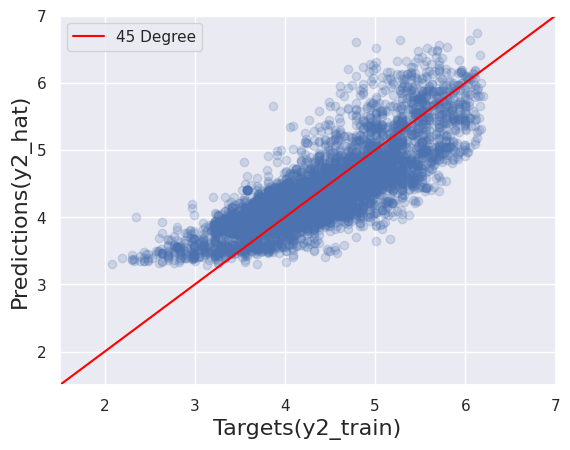

In [171]:

plt.axline((0.1, 0.1), slope=1, color='red', label='45 Degree')
plt.scatter(y2_train, y2_hat,alpha=0.2)
plt.xlabel('Targets(y2_train)', size = 16)
plt.ylabel('Predictions(y2_hat)', size = 16)
plt.xlim(1.5,7)
plt.ylim(1.5,7)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

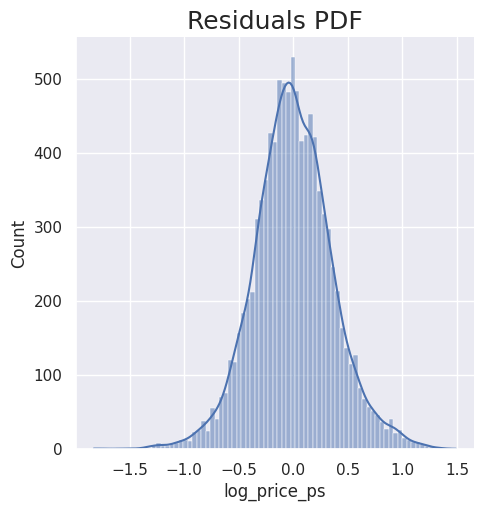

In [172]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y2_train - y2_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are some negative residuals (far away from the mean)
# Given the definition of the residuals (y2_train - y2_hat), negative values imply
# that y2_hat (predictions) are much higher than y2_train (the targets)
# This is an issue for thought to improve our model

In [173]:
# R-squared of the model
reg2.score(x_train,y2_train)


0.6592010475642377

In [174]:
# Adjusted R-squared of the model
def adj_r2(x,y):
    r2 = reg2.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print('Adjusted R-squared:', adj_r2(x_train,y2_train))
# It seems the differance between R-squared and adjusted R-squared is very low.
# No inputs have been penalized

Adjusted R-squared: 0.6589957057571867


## Finding the weights and bias

In [175]:
# Creating a regression summary where we can compare them with one-another
reg2_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg2_summary['Weights'] = reg2.coef_
reg2_summary

,Features,Weights
0,total_sqft,0.408313
1,balcony,0.016962
2,bhk,0.099279
3,area_type_Carpet Area,0.008302
4,area_type_Plot Area,0.132272
5,area_type_Super built-up Area,0.014078


In [165]:
data7['area_type'].unique()
# In this way we can see which 'area_type' is actually the benchmark
# In this case 'Built-up Area' is the benchmark

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

## Let's find the regression for 'price'

In [176]:
x_train, x_test, y1_train, y1_test = train_test_split(inputs_scl, target1, test_size=0.2, random_state=365)

In [177]:
# Creating Regression
reg1 = LinearRegression()
reg1.fit(x_train, y1_train)

LinearRegression()

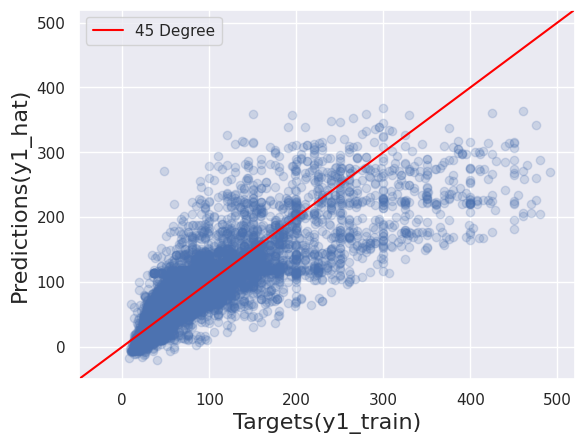

In [186]:
y1_hat = reg1.predict(x_train)

plt.axline((0.1, 0.1), slope=1, color='red', label='45 Degree')
plt.scatter(y1_train, y1_hat,alpha=0.2)
plt.xlabel('Targets(y1_train)', size = 16)
plt.ylabel('Predictions(y1_hat)', size = 16)
plt.xlim(-50,520)
plt.ylim(-50,520)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals PDF')

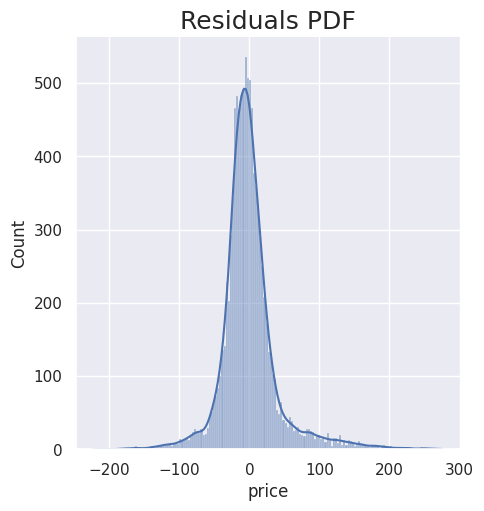

In [187]:
sns.displot(y1_train - y1_hat, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

# In this case we notice that there are some positive residuals (far away from the mean)
# Given the definition of the residuals (y1_train - y1_hat), positive values imply
# that y2_hat (predictions) are much lower than y2_train (the targets)

In [188]:
# R-squared of the model
reg1.score(x_train,y1_train)
# Clearly we have gain some accuracy in reg2 which is modeled from log price of per sqft

0.649038748950215

In [189]:
def adj_r2(x,y):
    r2 = reg1.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print('Adjusted R-squared:', adj_r2(x_train,y1_train))

Adjusted R-squared: 0.6488272840469915


# Testing

In [190]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y2_hat_test = reg2.predict(x_test)

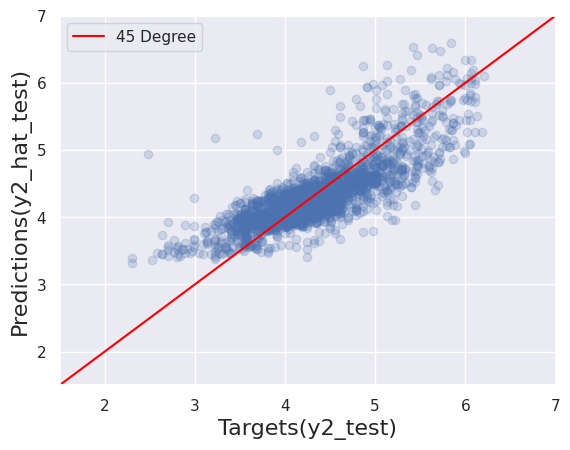

In [191]:
plt.axline((0.1, 0.1), slope=1, color='red', label='45 Degree')
plt.scatter(y2_test, y2_hat_test,alpha=0.2)
plt.xlabel('Targets(y2_test)', size = 16)
plt.ylabel('Predictions(y2_hat_test)', size = 16)
plt.xlim(1.5,7)
plt.ylim(1.5,7)
plt.legend()
plt.show()

In [192]:
# Let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price_ps
df_pf = pd.DataFrame(np.exp(y2_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,45.095666
1,84.911076
2,58.230660
3,47.063165
4,65.547644


In [193]:
# To get a proper result, we must reset the index and drop the old indexing
y2_test = y2_test.reset_index(drop=True)

# Check the result
y2_test.head()

0    3.401197
1    4.356709
2    4.131961
3    4.189655
4    4.599052
Name: log_price_ps, dtype: float64

In [195]:
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y2_test)
df_pf

,Prediction,Target
0,45.095666,30.00
1,84.911076,78.00
2,58.230660,62.30
3,47.063165,66.00
4,65.547644,99.39
...,...,...
2487,51.302104,25.75
2488,76.716623,45.00
2489,79.998416,77.00
2490,61.784956,60.00


In [196]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [197]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,45.095666,30.00,-15.095666,50.318886
1,84.911076,78.00,-6.911076,8.860354
2,58.230660,62.30,4.069340,6.531846
3,47.063165,66.00,18.936835,28.692175
4,65.547644,99.39,33.842356,34.050061
...,...,...,...,...
2487,51.302104,25.75,-25.552104,99.231471
2488,76.716623,45.00,-31.716623,70.481384
2489,79.998416,77.00,-2.998416,3.894046
2490,61.784956,60.00,-1.784956,2.974927


In [198]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,2492.000000,2492.000000,2492.000000,2492.000000
mean,86.666219,91.614910,4.948691,29.311144
std,67.991853,71.262111,49.287937,36.915402
min,27.482848,10.000000,-466.428412,0.001216
25%,54.257484,48.000000,-13.403143,10.918675
50%,66.124149,68.000000,-1.085096,22.707114
75%,89.931614,108.000000,18.904611,37.025643
max,730.485067,495.000000,289.530292,1068.770169


In [199]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1407,56.90,56.90,0.00,0.00
1841,64.97,65.00,0.03,0.04
1477,46.02,46.00,-0.02,0.04
2292,85.04,85.00,-0.04,0.04
2417,85.05,85.00,-0.05,0.06
...,...,...,...,...
2012,522.20,130.00,-392.20,301.69
2450,363.08,90.00,-273.08,303.42
2079,187.60,40.00,-147.60,368.99
1765,177.37,25.00,-152.37,609.48


In [200]:
# determining the name of the file
file_name = 'Prediction_Analysis.xlsx'
 
# saving the excel
df_pf.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
